# $k$-means Clustering

## Intro

#### Import libraries and download dataset

The specific documentation for k-means can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [2]:
# Required packages for today
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Need scipy for hierarchical clustering visualizations
from scipy.cluster.hierarchy import dendrogram

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import a colleague's code for the demo clusters/visualizations
import src.demo_images as demo
import src.k_means_plotter as kmplot
import src.hier_example as hier

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

## Clustering!   Finding **GROUPS**

How many groups do you see?

<img src="images/initialscenario.png" width=600>

## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.
>
>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

| Method 1 | Method 2 |
| -------- | -------- |
| <img src="images/from-left.gif" width=400> | <img src="images/from-right.gif" width=400> |

| Method 3 | Method 4 |
| -------- | -------- |
| <img src="images/from-top.gif" width=400> | <img src="images/from-bottom.gif" width=400> |

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

### K-means algorithm, at its core, in an optimization function

<img src="images/minmaxdata.png" width=400>

### Reassigns groups and adjusts centroids to...

<img src="images/min.png" width=700>

### And to...

<img src="images/max.png" width=700>

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you want more detail.

## $k$-Means Plotter - Introducing the Challenges of Clustering

In [3]:
X, Y = datasets.make_blobs(centers=3)

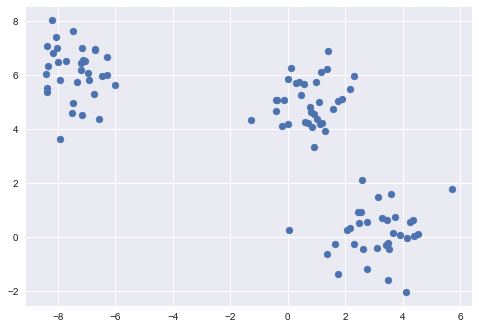

In [4]:
plt.scatter(X[:, 0], X[:, 1]);

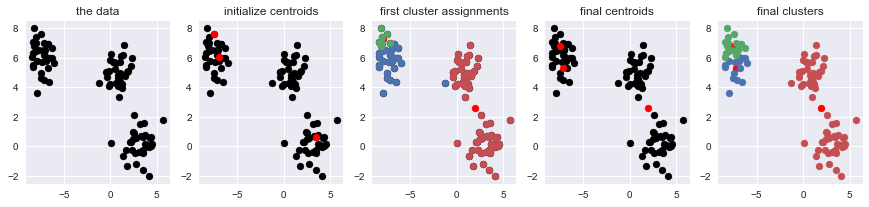

In [5]:
np.random.seed(1)
df = kmplot.k_means(X[:, 0], X[:, 1], k=3)

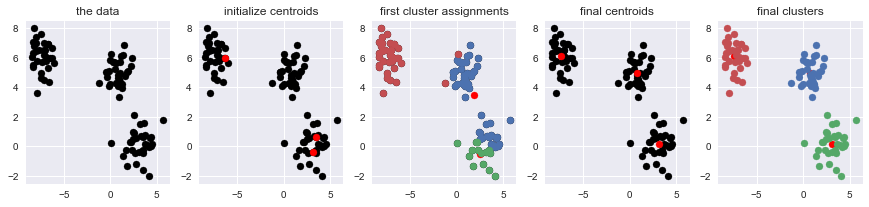

In [6]:
np.random.seed(42)
df = kmplot.k_means(X[:, 0], X[:, 1], k=3)

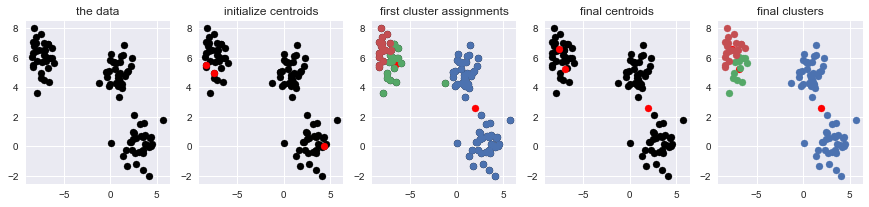

In [7]:
np.random.seed(2)
df = kmplot.k_means(X[:, 0], X[:, 1], k=3)

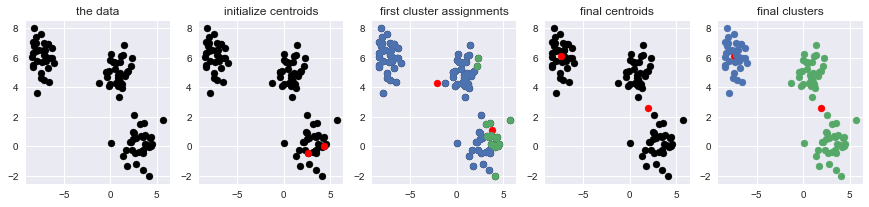

In [8]:
np.random.seed(1)
df = kmplot.k_means(X[:, 0], X[:, 1], k=2)

## **Assumptions** and **challenges** of $k$-means

- Demonstrate the ideal $k$-means dataset
- Show three scenarios where $k$-means struggles

#### Ideal $k$-means scenario

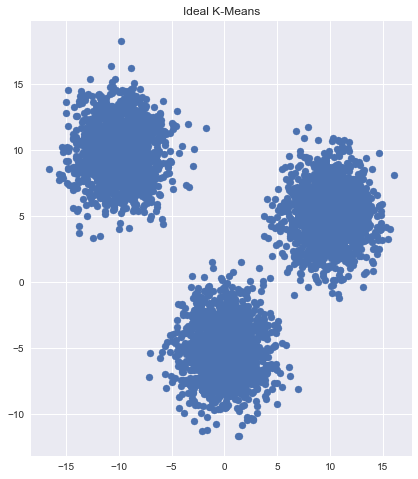

In [9]:
demo.ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

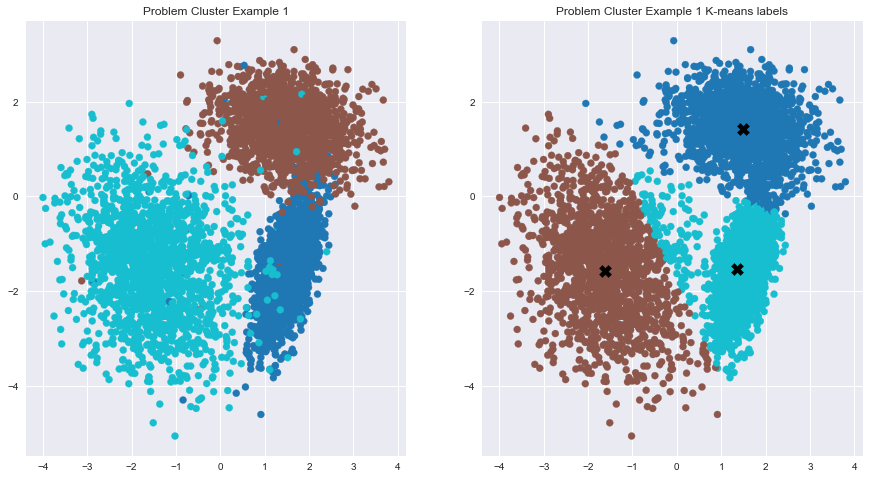

In [10]:
demo.messyOne()

#### Problem Scenario 2 - imbalanced class size

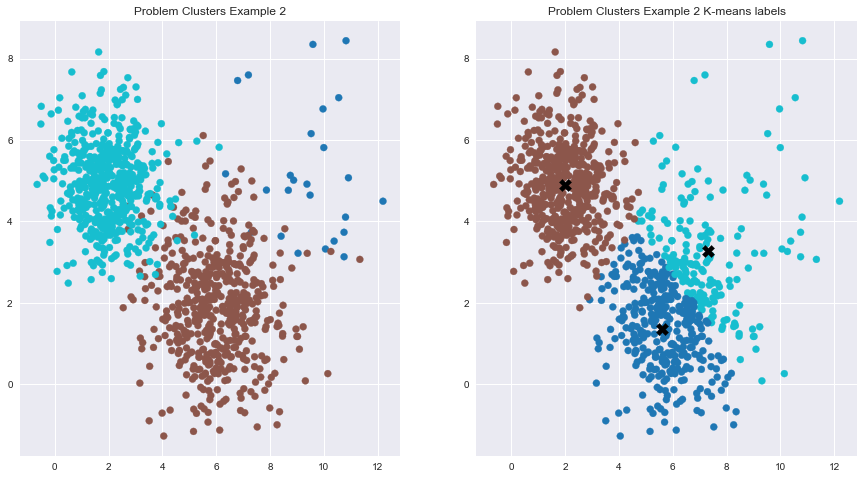

In [11]:
demo.messyTwo()

#### Problem Scenario 3 - class size and density

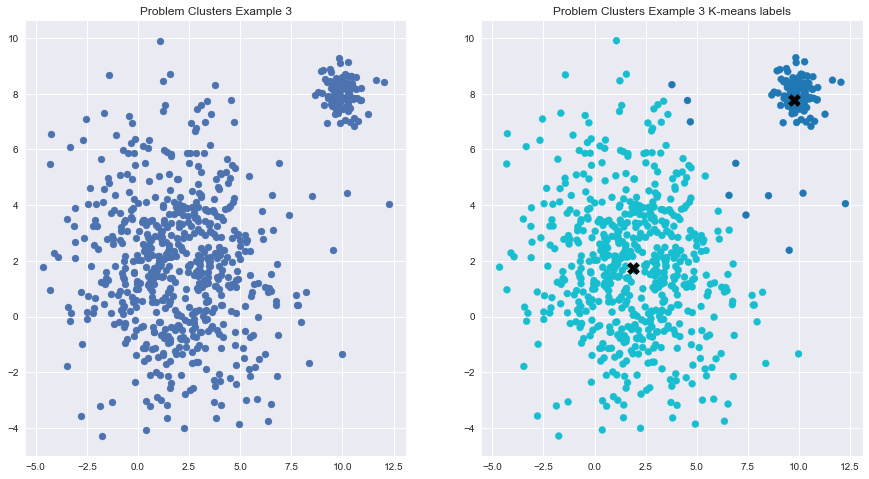

In [12]:
demo.messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

## Exercise:
### $k$-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

The dataset is `Wine.csv`

In [13]:
# Work on problem here: Would scaling make a difference?
wine = pd.read_csv('data/Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True) # removing spoilers
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [15]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


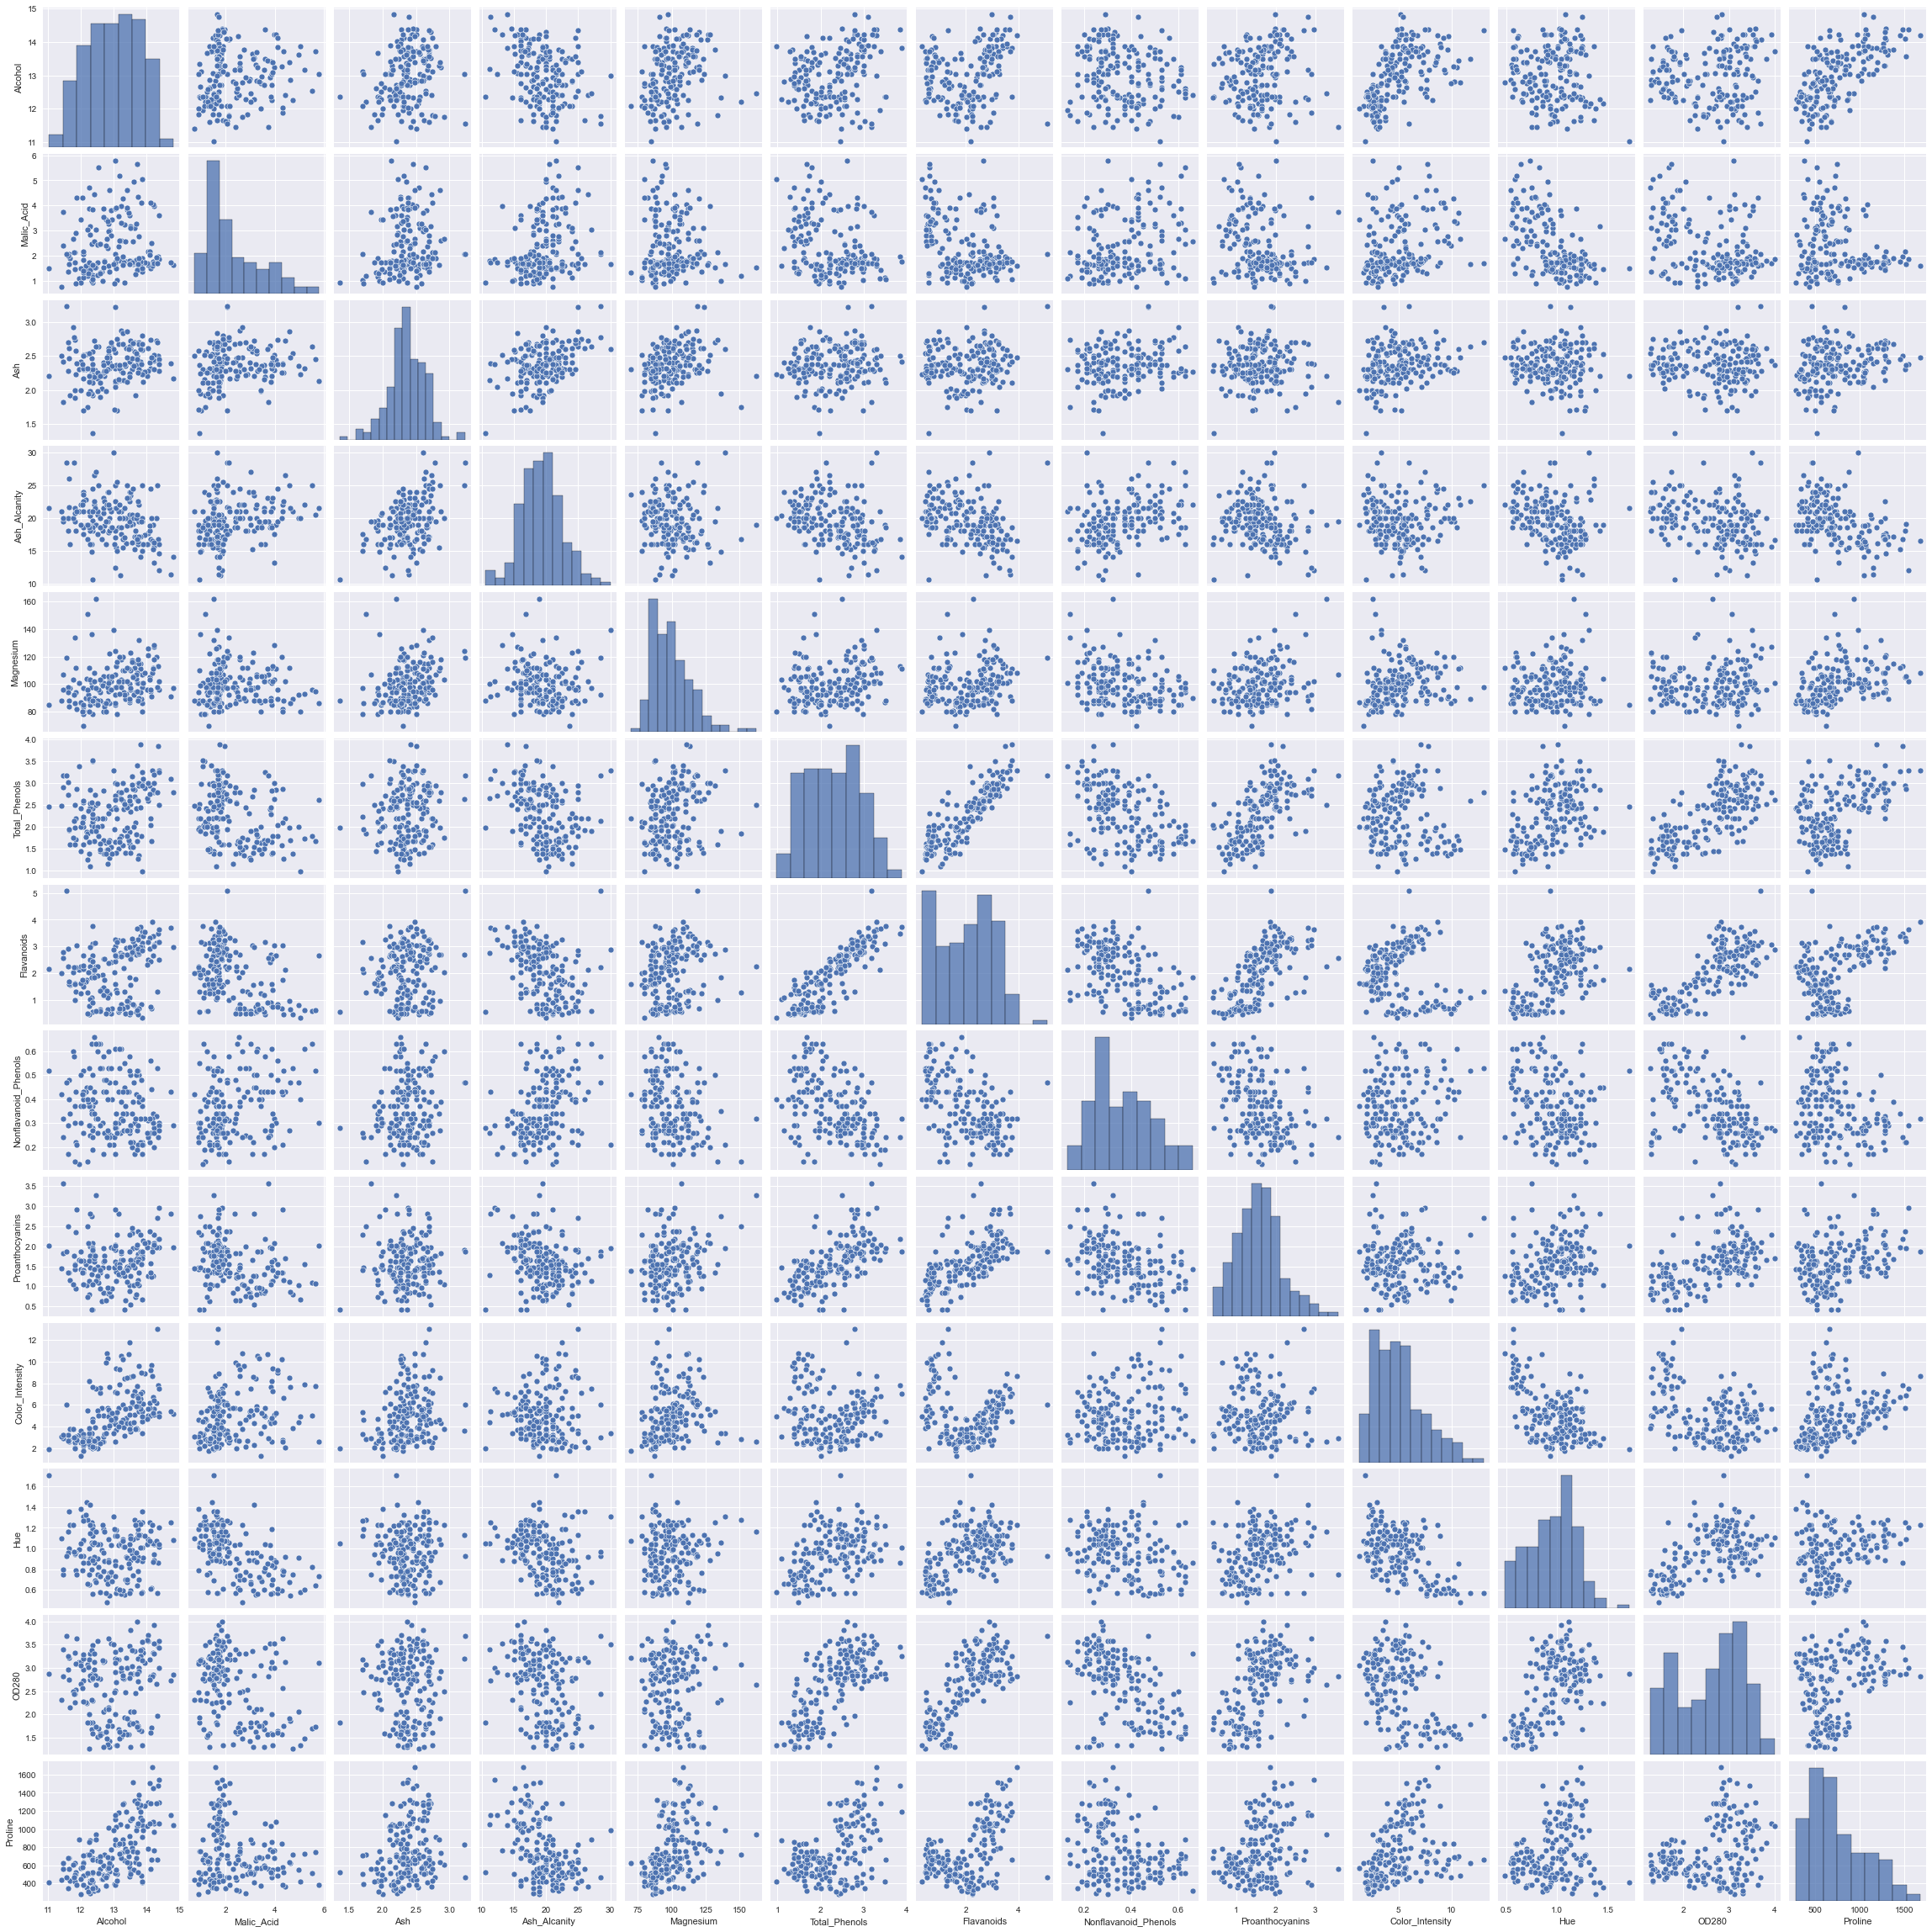

In [16]:
sns.pairplot(wine)

### Start!

In [17]:
# Let's scale the data first
scaler = StandardScaler()

wine_scaled = scaler.fit_transform(wine)

In [18]:
# Now - initialize KMeans! How many clusters...?
model = KMeans(n_clusters=5)
model.fit(wine_scaled)

KMeans(n_clusters=5)

In [19]:
# Let's explore
model.cluster_centers_

array([[ 1.14014108, -0.34880545, -0.03905191, -1.08201005,  0.40821914,
         1.03198854,  1.0794397 , -0.7916216 ,  0.74111409,  0.37451866,
         0.3451154 ,  0.87372637,  1.3037709 ],
       [ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841, -0.39632062],
       [-1.00590304, -0.34248856,  0.15894572,  0.66214528, -0.48895133,
        -0.54052184, -0.31533036,  0.80576384, -0.40844778, -0.93881187,
         0.53214603, -0.10229777, -0.73067831],
       [-0.82190575, -0.33536544, -1.04183377, -0.27099034, -0.45579503,
         0.22334521,  0.24143426, -0.57898505,  0.28270074, -0.8319791 ,
         0.3281754 ,  0.49479935, -0.68376895],
       [ 0.40539175, -0.40426108,  1.11956931,  0.17448245,  0.82419417,
         0.72054869,  0.85410495, -0.23088783,  0.4441553 , -0.10299054,
         0.78336179,  0.63943349,  0.79837405]])

In [20]:
model.labels_

array([0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4,
       0, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 3, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 3, 2, 2, 3, 3, 2, 4,
       3, 3, 2, 3, 2, 4, 2, 4, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 3, 3, 1, 3, 3, 4, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [21]:
# Let's put our labels back into our data
labeled_df = pd.concat([wine, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [22]:
labeled_df['cluster'].value_counts()

1    50
3    40
0    36
2    27
4    25
Name: cluster, dtype: int64

In [23]:
# What do these look like?
labeled_df.groupby('cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,13.923611,1.947778,2.355833,15.891667,105.555556,2.939167,3.104444,0.263611,2.013889,5.923889,1.036111,3.230278,1156.305556
1,13.144000,3.346200,2.425600,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
2,12.186296,1.954815,2.410000,21.700000,92.777778,1.957778,1.715185,0.461852,1.357778,2.887778,1.078741,2.539259,517.444444
3,12.335250,1.962750,2.081500,18.592500,93.250000,2.434500,2.269750,0.290000,1.752250,3.134750,1.032250,2.962000,532.175000
4,13.328800,1.886000,2.672800,20.076000,111.480000,2.744800,2.880000,0.333200,1.844400,4.820000,1.136000,3.064400,997.600000


#### Note! 

You may have different cluster centers - the algorithm is sensitive to starting points.

Even if we set `n_init` to a significant value, it's still a good idea to use `random_state` to ensure repeatable results.

## Choosing the appropriate number for $k$

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### Elbow Method

Elbow method uses the sum of squared error (SSE) calculated from each instance of $k$ to find the best value of $k$.

This is sometimes called the "inertia" of the model, and fitted sklearn $k$-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

Fewer clusters seems better, but inertia will always decrease with _more_ clusters. Hence the idea of looking for an elbow in the plot of inertia vs. $k$.

In [24]:
model.inertia_

1115.1120940739609

Inertia is the sum of squared distances between points and their cluster center.

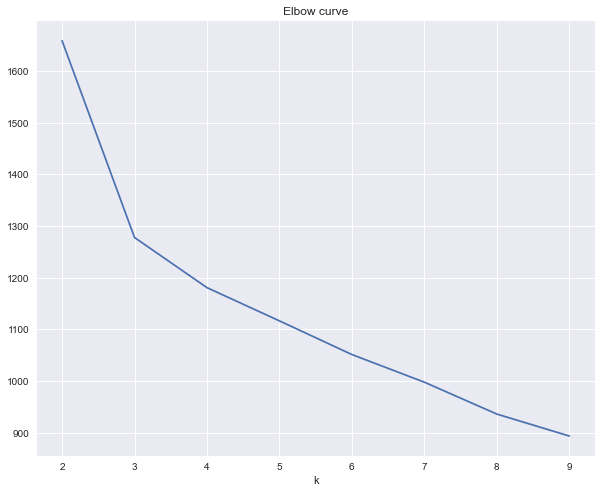

In [25]:
# From a colleague

distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(wine_scaled)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)

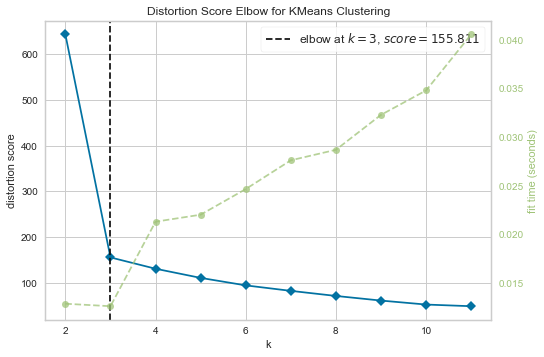

In [26]:
# If yellowbrick works for you...
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,12), timings=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

In [27]:
model = KMeans(n_clusters=3)
model.fit(wine_scaled)

KMeans(n_clusters=3)

In [28]:
labeled_df = pd.concat([wine, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [29]:
labeled_df.groupby('cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


In [30]:
wine_v2 = pd.read_csv('data/Wine.csv')
wine_v2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [33]:
wine_v2['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [34]:
labeled_df['cluster'].value_counts()

0    65
2    62
1    51
Name: cluster, dtype: int64

### Silhouette Coefficient

![silo](images/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.
>
> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

The Silhouette Coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html



In [35]:
labels = model.labels_

In [36]:
metrics.silhouette_score(wine_scaled, labels)

0.2848589191898987

In [39]:
silhouette_scores = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(wine_scaled)
    labels = kmeans.labels_
    silhouette_scores[k] = metrics.silhouette_score(wine_scaled, labels)

In [40]:
silhouette_scores

{2: 0.25931695553182543,
 3: 0.2848589191898987,
 4: 0.24983818367121804,
 5: 0.19378393784061979,
 6: 0.23475148190560874,
 7: 0.14392977764641107,
 8: 0.19147513476039243,
 9: 0.14300320554747034}

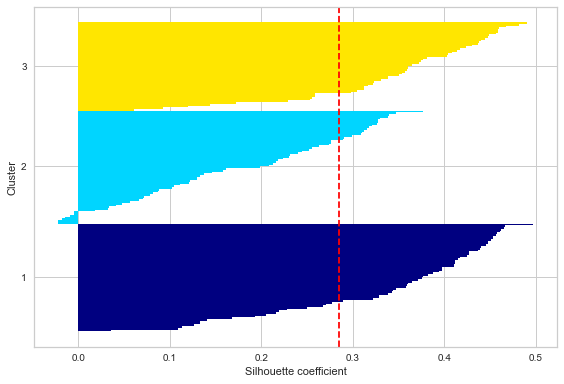

In [41]:
# From a colleague
from matplotlib import cm

km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(wine_scaled)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = metrics.silhouette_samples(wine_scaled, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

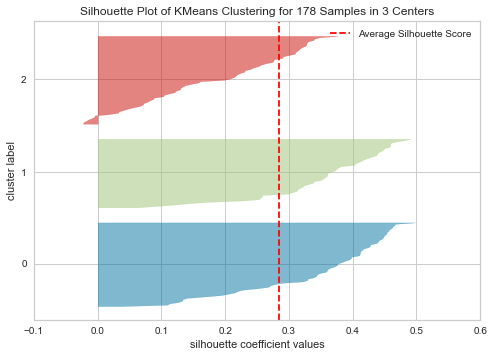

In [42]:
# If yellowbrick works for you...
# https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(wine_scaled)    # Fit the data to the visualizer
visualizer.show();             # Finalize and render the figure

### So - How many clusters fit the wine data?

What can you tell me about them?

- 


## Hierarchical Clustering

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

- **Agglomerative clustering** is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.
- **Divisive clustering** is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a **dendrogram**. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

![dendro](images/dendogram.png)

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The **strengths** of hierarchical clustering methods include:

- They often reveal the finer details about the relationships between data objects
- They provide an interpretable dendrogram

The **weaknesses** of hierarchical clustering methods include:

- They’re computationally expensive with respect to algorithm complexity
- They’re sensitive to noise and outliers

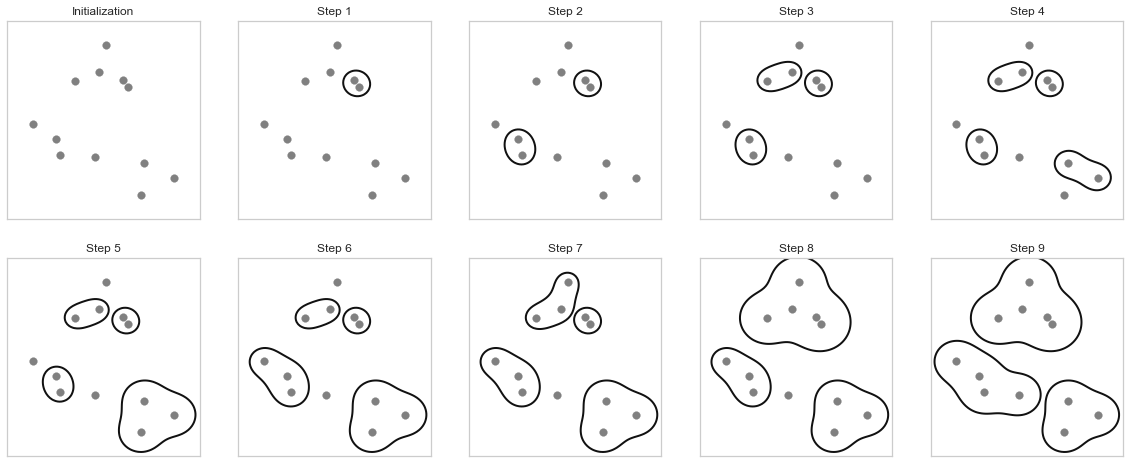

In [43]:
hier.plot_agglomerative_algorithm()

From sklearn's documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

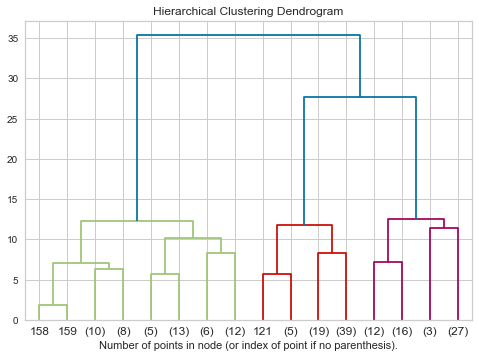

In [46]:
def plot_dendrogram(model, **kwargs):
    """ Create linkage matrix and then plot the dendrogram"""

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(wine_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### Thoughts?

- 


---
## Level Up

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.

In [47]:
shopping = pd.read_excel('data/Online Retail.xlsx')

In [48]:
shopping.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


In [49]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [52]:
shopping['Country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [55]:
shopping.groupby('InvoiceNo').agg(['sum', 'mean', 'count'])

Quantity                     UnitPrice                   CustomerID  \
               sum          mean count       sum        mean count        sum   
InvoiceNo                                                                       
536365          40      5.714286     7     27.37    3.910000     7   124950.0   
536366          12      6.000000     2      3.70    1.850000     2    35700.0   
536367          83      6.916667    12     58.24    4.853333    12   156564.0   
536368          15      3.750000     4     19.10    4.775000     4    52188.0   
536369           3      3.000000     1      5.95    5.950000     1    13047.0   
...            ...           ...   ...       ...         ...   ...        ...   
C581484     -80995 -80995.000000     1      2.08    2.080000     1    16446.0   
C581490        -23    -11.500000     2      2.78    1.390000     2    28794.0   
C581499         -1     -1.000000     1    224.69  224.690000     1    15498.0   
C581568         -5     -5.000000     1     10.95   10.950000     1    15311.0   
C581569         -6     -3.000000     2      2.50    1.250000     2    34630.0   

                          
              mean count  
InvoiceNo                 
536365     17850.0     7  
536366     17850.0     2  
536367     13047.0    12  
536368     13047.0     4  
536369     13047.0     1  
...            ...   ...  
C581484    16446.0     1  
C581490    14397.0     2  
C581499    15498.0     1  
C581568    15311.0     1  
C581569    17315.0     2  

[25900 rows x 9 columns]

In [63]:
sh_withoutreturns = shopping[shopping['InvoiceNo'].str.contains('C').isna() == True]

In [67]:
sh_withoutreturns.groupby('InvoiceNo').sum()['Quantity']

InvoiceNo
536365     40
536366     12
536367     83
536368     15
536369      3
         ... 
581583     76
581584    120
581585    278
581586     66
581587    105
Name: Quantity, Length: 22061, dtype: int64

In [70]:
sh_withoutreturns.groupby('InvoiceNo').mean()['UnitPrice']

InvoiceNo
536365    3.910000
536366    1.850000
536367    4.853333
536368    4.775000
536369    5.950000
            ...   
581583    1.650000
581584    1.285000
581585    1.799048
581586    5.057500
581587    2.966667
Name: UnitPrice, Length: 22061, dtype: float64

In [71]:
sh_test = pd.DataFrame(sh_withoutreturns.groupby('InvoiceNo').sum()['Quantity'])

In [73]:
sh_test['meanUnitPrice'] = sh_withoutreturns.groupby('InvoiceNo').mean()['UnitPrice']

In [74]:
sh_test

,Quantity,meanUnitPrice
InvoiceNo,,
536365,40,3.910000
536366,12,1.850000
536367,83,4.853333
536368,15,4.775000
536369,3,5.950000
...,...,...
581583,76,1.650000
581584,120,1.285000
581585,278,1.799048


In [76]:
sh_test.describe()

,Quantity,meanUnitPrice
count,22061.000000,22061.000000
mean,247.224559,7.156284
std,932.324253,131.101683
min,-9600.000000,0.000000
25%,48.000000,1.765652
50%,133.000000,2.673000
75%,275.000000,3.951176
max,80995.000000,13541.330000


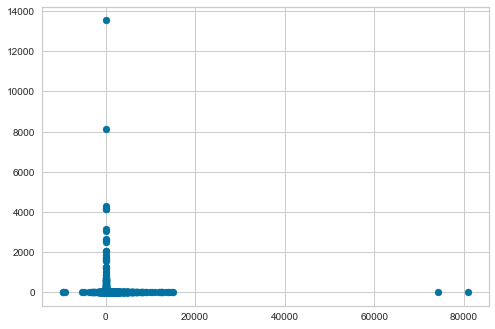

In [75]:
plt.scatter(sh_test['Quantity'], sh_test['meanUnitPrice'])

In [81]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

sh_test_scaled = scaler.fit_transform(sh_test)

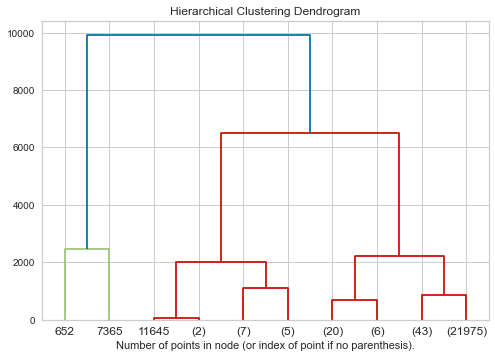

In [82]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(sh_test_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()